# Dimension reduction

# Reading

1. Bishop. Pattern Recogniton and Machine Learning, 12.1  
2. https://en.wikipedia.org/wiki/Principal_component_analysis
3. https://en.wikipedia.org/wiki/Singular-value_decomposition

## PCA

1. standartize data  
2. compute covariance matrix
3. compute eigenvalues and eigenvectors
4. select top k largest eigenvalues and make projection

In [38]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


data = datasets.load_iris()
df = pd.read_csv('train.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df.shape

(891, 11)

In [40]:
# missing data
for name in df.columns:
    print(name, pd.isnull(df[name]).sum())

Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


In [44]:
from sklearn.preprocessing import LabelEncoder

features = ['Age', 'Fare', 'Sex', 'Pclass', 'Survived']
df = df[features]
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df = df.dropna()

df.head()

,Age,Fare,Sex,Pclass,Survived
PassengerId,,,,,
1,22.0,7.2500,1,3,0
2,38.0,71.2833,0,1,1
3,26.0,7.9250,0,3,1
4,35.0,53.1000,0,1,1
5,35.0,8.0500,1,3,0


In [45]:
df.shape

(714, 5)

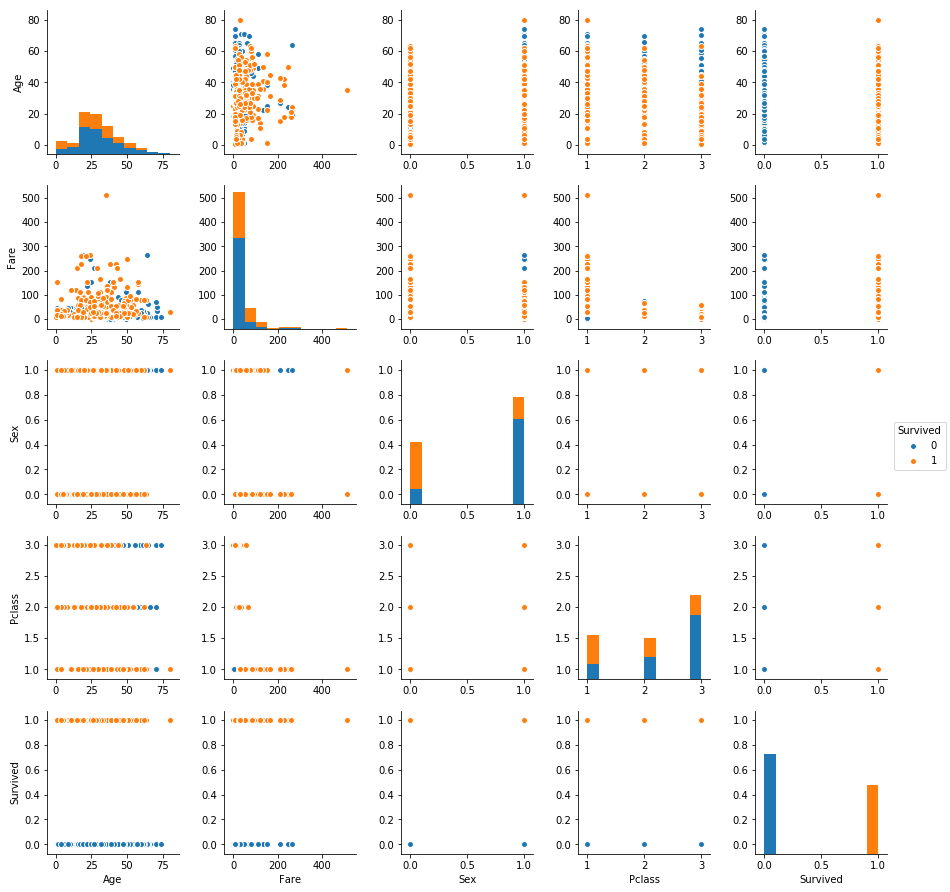

In [46]:
sns.pairplot(df, hue='Survived')

In [60]:
# Covariance matrix on standartized data

from sklearn.preprocessing import StandardScaler


X = StandardScaler().fit_transform(df.drop('Survived', axis=1))
mean_vec = np.mean(X, axis=0)
cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00140252  0.09620143  0.09338437 -0.36974386]
 [ 0.09620143  1.00140252 -0.18525371 -0.55495973]
 [ 0.09338437 -0.18525371  1.00140252  0.15567834]
 [-0.36974386 -0.55495973  0.15567834  1.00140252]]


In [61]:
# or just
np.cov(X.T)

array([[ 1.00140252,  0.09620143,  0.09338437, -0.36974386],
       [ 0.09620143,  1.00140252, -0.18525371, -0.55495973],
       [ 0.09338437, -0.18525371,  1.00140252,  0.15567834],
       [-0.36974386, -0.55495973,  0.15567834,  1.00140252]])

In [78]:
eig_vals, eig_vecs = np.linalg.eigh(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.35393946 -0.55875082  0.65032896 -0.37362631]
 [-0.57591071  0.51709383 -0.21195796 -0.59666963]
 [ 0.06477714  0.64350035  0.72470933  0.23771329]
 [-0.73406923 -0.07949087 -0.08332133  0.66923921]]

Eigenvalues 
[ 0.37399768  0.75222294  1.12148547  1.75790401]


In [63]:
cov_mat.dot(eig_vecs.T[0]) - eig_vals[0]*eig_vecs.T[0]

array([  9.99200722e-16,   4.44089210e-16,  -1.66533454e-16,
        -4.44089210e-16])

In [79]:
# Correlation matrix on standartized data

X = StandardScaler().fit_transform(df.drop('Survived', axis=1))

corr_mat = np.corrcoef(X.T)                                           
eig_vals, eig_vecs = np.linalg.eigh(corr_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.35393946 -0.55875082  0.65032896 -0.37362631]
 [-0.57591071  0.51709383 -0.21195796 -0.59666963]
 [ 0.06477714  0.64350035  0.72470933  0.23771329]
 [-0.73406923 -0.07949087 -0.08332133  0.66923921]]

Eigenvalues 
[ 0.37347387  0.75116941  1.11991476  1.75544196]


In [80]:
# Correlation matrix on raw data

X = df.drop('Survived', axis=1)
corr_mat = np.corrcoef(X.T)                                           
eig_vals, eig_vecs = np.linalg.eigh(corr_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.35393946 -0.55875082  0.65032896 -0.37362631]
 [-0.57591071  0.51709383 -0.21195796 -0.59666963]
 [ 0.06477714  0.64350035  0.72470933  0.23771329]
 [-0.73406923 -0.07949087 -0.08332133  0.66923921]]

Eigenvalues 
[ 0.37347387  0.75116941  1.11991476  1.75544196]


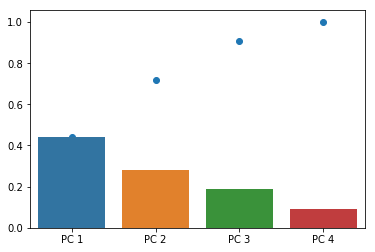

In [84]:
tot_variance = np.sum(eig_vals)
var_exp = [(i / tot_variance) for i in reversed(eig_vals)]
cum_var_exp = np.cumsum(var_exp)

sns.barplot(x=['PC %s' %i for i in range(1,5)], y=var_exp)
plt.scatter(x=['PC %s' %i for i in range(1,5)], y=cum_var_exp, label='cumulative explained variance')

In [100]:
# project data on new feature space


proj_matrix = eig_vecs[:, 2:]
proj_matrix

array([[ 0.65032896, -0.37362631],
       [-0.21195796, -0.59666963],
       [ 0.72470933,  0.23771329],
       [-0.08332133,  0.66923921]])

Text(0.5,1,'Fare')

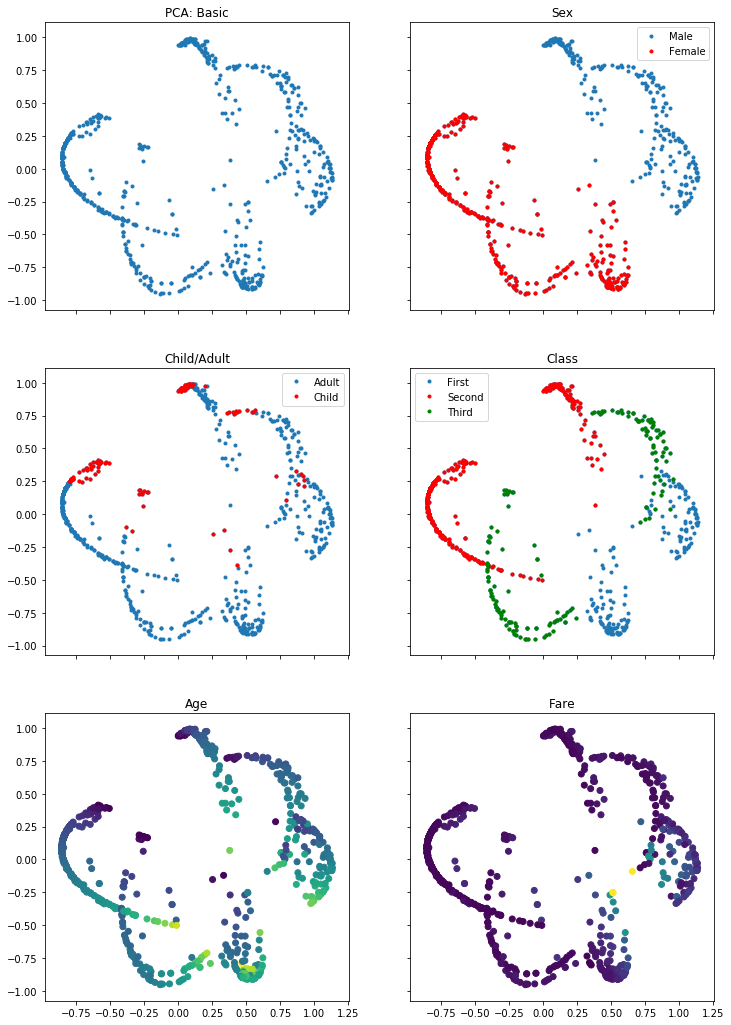

In [119]:
from sklearn.decomposition import PCA
from sklearn import preprocessing


X = preprocessing.normalize(preprocessing.scale(df.drop('Survived', True)))


pca = PCA(n_components=2, whiten=False)
trans = pca.fit_transform(X)

fig, axs = plt.subplots(3, 2, squeeze=False, sharex=True, sharey=True, figsize=(12, 18))
axs[0, 0].plot(trans[:,0], trans[:,1], '.')
axs[0, 0].set_title('PCA: Basic')

female_trans = np.array([tran for is_female, tran in zip(df['Sex'], trans) if is_female==1])
axs[0, 1].plot(trans[:,0], trans[:,1], '.', label='Male')
axs[0, 1].plot(female_trans[:,0], female_trans[:,1], 'r.', label='Female')
axs[0, 1].set_title('Sex')
axs[0, 1].legend()

child_trans = np.array([tran for is_child, tran in zip(df['Age'] < 18, trans) if is_child==True])
axs[1, 0].plot(trans[:,0], trans[:,1], '.', label='Adult')
axs[1, 0].plot(child_trans[:,0], child_trans[:,1], 'r.', label='Child')
axs[1, 0].set_title('Child/Adult')
axs[1, 0].legend()

third_trans = np.array([tran for my_class, tran in zip(df['Pclass'], trans) if my_class==3])
second_trans = np.array([tran for my_class, tran in zip(df['Pclass'], trans) if my_class==2])
axs[1, 1].plot(trans[:,0], trans[:,1], '.', label='First')
axs[1, 1].plot(third_trans[:,0], third_trans[:,1], '.r', label='Second')
axs[1, 1].plot(second_trans[:,0], second_trans[:,1], '.g', label='Third')
axs[1, 1].set_title('Class')
axs[1, 1].legend()

axs[2, 0].scatter(trans[:,0], trans[:,1], edgecolors='face', c=df['Age'].as_matrix())
axs[2, 0].set_title('Age')

axs[2, 1].scatter(trans[:,0], trans[:,1], edgecolors='face', c=df['Fare'].as_matrix())
axs[2, 1].set_title('Fare')

## SVD

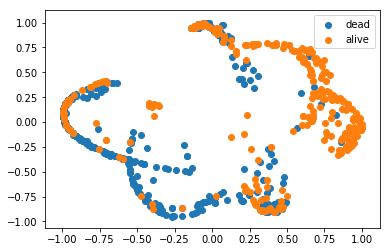

In [133]:
from sklearn.decomposition import TruncatedSVD


X = preprocessing.normalize(preprocessing.scale(df.drop('Survived', True)))
y = df.Survived.values

svd = TruncatedSVD(n_components=2, random_state=1337)
X = svd.fit_transform(X)
plt.scatter(X[y == 0, 0], X[y == 0, 1],  label='dead')
plt.scatter(X[y== 1, 0], X[y == 1, 1],  label='alive')
plt.legend()

# Eigenfaces

In [ ]:
from time import time
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(data_home='./', min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

        
plot_gallery(X, target_names[y], h, w)
plt.show()
print()
print('eigenfaces')
        
        

# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

